<a href="https://colab.research.google.com/github/wannabedain/school_work/blob/main/8_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%A0%84%EC%B2%B4%EB%AA%A8%EC%9D%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단순선형회귀분석

x데이터 형태: (10, 1)
y데이터 형태: (10,)
회귀계수(기울기): [1.339]
절편: 4.562
x: [17  8 10 20 13 22 14  3  1 26]
y: [33 13 22 25 24 38 20 10  3 37]
y예측값: [27.31904119 15.27143822 17.94868332 31.33490885 21.96455098 34.01215395
 23.30317353  8.57832546  5.90108035 39.36664416]
MSE: 14.097
x = 50 의 y예측값: [71.49358542]
x = -10,0,10의 y예측값: [-8.82376772  4.5624578  17.94868332]


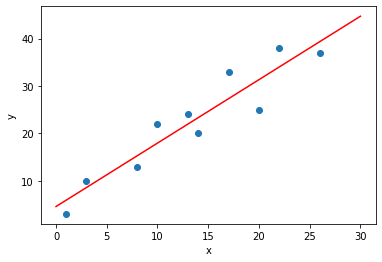

In [ ]:
# 데이터 입력하기

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = np.array([17, 8, 10, 20, 13, 22, 14, 3, 1, 26])
y = np.array([33, 13, 22, 25, 24, 38, 20, 10, 3, 37])
x = x.reshape(-1, 1)   # -1은 데이터에 맞게 임의로 지정하라는 뜻

print("x데이터 형태:", x.shape)   # x는 행렬 힝렬 : 10 * 1
print("y데이터 형태:", y.shape)   # y는 벡터 형태 : 길이10


# 단순선형회귀모형 적용
model = LinearRegression()
model.fit(x, y)                    # 파라미터 추정

print("회귀계수(기울기):", np.round(model.coef_, 3))    # 기울기
print("절편:", np.round(model.intercept_, 3))           # 절편


# 예측값 y 구하기
y_pred = model.predict(x)
print("x:", x.reshape(-1))
print("y:", y)
print("y예측값:", y_pred)


# 추세선
x_new = np.linspace(0, 30, 100)         # x는 0에서 30까지 
y_new = model.predict(x_new[:, np.newaxis])
plt.scatter(x, y)
plt.plot(x_new, y_new, 'r')
plt.xlabel("x")
plt.ylabel("y");


# 평균제곱오차(MSE)를 이용한 모형 평가
mse = mean_squared_error(y, y_pred)
print("MSE: %.3f" %mse)


# 임의의 x값에 대한 y값의 예측
print("x = 50 의 y예측값:", model.predict([[50]]))
print("x = -10,0,10의 y예측값:", model.predict([[-10], [0], [10]]))

기온(x) 데이터 형태: (10, 1)
아이스크림 판매량(y) 데이터 형태: (10,)
회귀계수(기울기): [7.273]
절편: -97.752
기온(x) = 38.2 의 아이스크림 판매량(y) 예측값: [180.07477389]


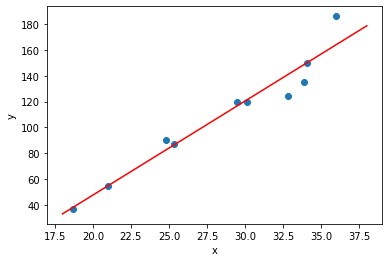

In [ ]:
# 21p 연습문제

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = np.array([25.3, 30.1, 32.8, 33.9, 36.0, 34.1, 29.5, 24.8, 21.0, 18.7])
y = np.array([87, 120, 124, 135, 186, 150, 120, 90, 55, 37])
x = x.reshape(-1, 1)

print("기온(x) 데이터 형태:", x.shape)
print("아이스크림 판매량(y) 데이터 형태:", y.shape)

model = LinearRegression()
model.fit(x, y)

print("회귀계수(기울기):", np.round(model.coef_, 3))
print("절편:", np.round(model.intercept_, 3))

x_new = np.linspace(18, 38, 100)
y_new = model.predict(x_new[:, np.newaxis])
plt.scatter(x, y)
plt.plot(x_new, y_new, 'r')
plt.xlabel("x")
plt.ylabel("y");

print("기온(x) = 38.2 의 아이스크림 판매량(y) 예측값:", model.predict([[38.2]]))

# 다중선형회귀분석

In [ ]:
#  보스턴 주택가격 데이터 입력하기
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boston = datasets.load_boston()

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y_df = pd.DataFrame(boston['target'], columns=['Target'])

In [ ]:
X_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y_df

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
#훈련데이터와 시험데이터로 분리 : 훈련데이터 80%, 시험데이터 20%
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, shuffle=True, random_state=23)

print("훈련데이터 X와 y의 차원", X_train.shape, y_train.shape)
print("시험데이터 X와 y의 차원", X_test.shape, y_test.shape)


# 훈련데이터에 다중선형회귀모형 적용
model = LinearRegression()
model.fit(X_train, y_train)

print("회귀계수(w):", [np.round(x, 3) for x in model.coef_[0]])
print("절편(b):", np.round(model.intercept_, 3))


# 평균제곱오차(MSE)를 이용한 모형 평가
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print("훈련데이터 MSE: %.3f" %mse)

y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print("시험데이터 MSE: %.3f" %mse)

훈련데이터 X와 y의 차원 (404, 13) (404, 1)
시험데이터 X와 y의 차원 (102, 13) (102, 1)
회귀계수(w): [-0.102, 0.047, 0.015, 3.303, -19.726, 3.644, 0.005, -1.511, 0.276, -0.01, -0.891, 0.01, -0.559]
절편(b): [37.013]
훈련데이터 MSE: 22.022
시험데이터 MSE: 21.953


훈련데이터와 시험데이터의 mse차이가 거의 없으므로 과적합 문제가 없다고 볼 수 있음

In [ ]:
## 38p 연습문제

X_data = X_df.loc[:, ['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
y_data = y_df

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=23)

print("훈련데이터 X와 y의 차원", X_train.shape, y_train.shape)
print("시험데이터 X와 y의 차원", X_test.shape, y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

print("회귀계수(w):", [np.round(x, 3) for x in model.coef_[0]])
print("절편(b):", np.round(model.intercept_, 3))

y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print("훈련데이터 MSE: %.3f" %mse)

y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print("시험데이터 MSE: %.3f" %mse)

훈련데이터 X와 y의 차원 (404, 5) (404, 1)
시험데이터 X와 y의 차원 (102, 5) (102, 1)
회귀계수(w): [-18.164, 3.894, -1.233, -1.018, -0.615]
절편(b): [39.51]
훈련데이터 MSE: 24.870
시험데이터 MSE: 24.009


mse(오차)의 결과가 커졌다.